In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import gc
import sys
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('precision',2)

In [4]:
master_df= pd.read_csv('telecom_churn_data.csv',encoding="ISO-8859-1",low_memory=True)
master_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,

In [5]:
master_df.shape

(99999, 226)

In [6]:
dd= pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx',encoding="ISO-8859-1")
dd

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


# Data filtering

As mentioned in the problem statement, I need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:
(master_df.isnull().sum()/master_df.shape[0])*100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [8]:
### imputing the below columns with  0 as they mean they have not recharged
for i in ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    master_df[i] = master_df[i].fillna(0).astype(int)

In [9]:
master_df['total_data_rech_amt_6'] = master_df['total_rech_data_6'] * master_df['av_rech_amt_data_6']
master_df['total_data_rech_amt_7'] = master_df['total_rech_data_7'] * master_df['av_rech_amt_data_7']

master_df['tot_rech_6'] = master_df['total_rech_amt_6'] + master_df['total_data_rech_amt_6']
master_df['tot_rech_7'] = master_df['total_rech_amt_7'] + master_df['total_data_rech_amt_7']

In [10]:
master_df['avg_rech_6_7']= (master_df['tot_rech_6']+master_df['tot_rech_7'])/2

(array([9.9702e+04, 2.2100e+02, 4.6000e+01, 1.9000e+01, 7.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  6123.6, 12247.2, 18370.8, 24494.4, 30618. , 36741.6,
        42865.2, 48988.8, 55112.4, 61236. ]),
 <a list of 10 Patch objects>)

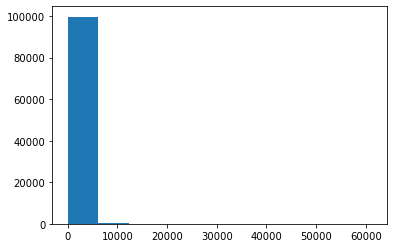

In [11]:
plt.hist(master_df['avg_rech_6_7'])

In [12]:
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,tot_rech_6,tot_rech_7,avg_rech_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,N

In [13]:
X= master_df['avg_rech_6_7'].quantile(0.7)

In [14]:
X

478.0

In [15]:
master_df= master_df.loc[master_df['avg_rech_6_7']>=X,:]

In [16]:
master_df.drop(['total_data_rech_amt_6','total_data_rech_amt_7','tot_rech_6','tot_rech_7'],axis=1,inplace=True)

In [17]:
master_df.shape

(30001, 227)

# Churn Tag

Churn customers are those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [18]:
master_df['churn']= 0
master_df.loc[((master_df['total_ic_mou_9']==0) & 
              (master_df['total_og_mou_9']==0) &
              (master_df['vol_2g_mb_9']==0) &
              (master_df['vol_3g_mb_9']==0)), 'churn']= 1
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN

Dropping all the variables related to 9 month as told in the problem statement.

In [19]:
del_col=[ x for x in master_df.columns if '9' in x]
print(del_col)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [20]:
master_df.drop(del_col,axis=1, inplace=True)

In [21]:
master_df.drop('sep_vbc_3g',axis=1, inplace=True)

In [22]:
master_df.shape

(30001, 173)

In [23]:
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.38,214.82,213.80,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1,1,1,252,252,252,0.0,0.0,0.0,1.0,1.0,1.0,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,7

### Checking the null value % for each column

In [24]:
(master_df.isnull().sum()/master_df.shape[0])*100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

Imputing Categorical columns null values as  -1.

In [25]:
# We can impute these 
master_df[['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]] = master_df[['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]].apply(lambda x: x.fillna(-1))

In [26]:
(master_df.isnull().sum()/master_df.shape[0])*100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

We could see some columns are having more than 40% missing data. It is better to remove them.

In [27]:
del_col= (master_df.isnull().sum()/master_df.shape[0])>0.4
master_df.drop(master_df.columns[del_col],axis=1,inplace=True)

In [28]:
(master_df.isnull().sum()/master_df.shape[0])*100

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_6        1.82
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou

In [29]:
import datetime as dt
datetime= ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
          'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
for x in datetime:
    master_df[x]= pd.to_datetime(master_df[x])
for i in datetime:
    master_df[i] = master_df[i].dt.day.fillna(0).astype(int)

In [30]:
(master_df.isnull().sum()/master_df.shape[0])*100

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_6    0.00
last_date_of_month_7    0.00
last_date_of_month_8    0.00
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_6        1.82
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou

Imputing the null values with KNN imputer.

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
tel_final_filled = imputer.fit_transform(master_df)

In [32]:
tel_final_filled = pd.DataFrame(tel_final_filled,columns = master_df.columns )
tel_final_filled.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn
0,7.00e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,0.0,0.0,0.0,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,0.0,0.0,0.0,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,559.0,1.0
1,7.00e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,27.0,25.0,26.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,8

In [33]:
(tel_final_filled.isnull().sum()/tel_final_filled.shape[0])*100

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6        

In [34]:
tel_final_filled.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,churn
count,3.00e+04,30001.0,30001.0,30001.0,30001.0,30001.0,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.0,30001.0,30001.0,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.0,30001.0,30001.0,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.0,30001.00,30001.00,3.00e+04,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00
mean,7.00e+09,109.0,0.0,0.0,0.0,30.0,30.97,30.83,558.49,560.78,508.60,262.68,269.31,238.16,376.80,380.79,341.86,16.30,12.79,12.85,26.88,20.34,20.36,85.10,86.26,79.46,164.67,164.36,154.99,6.40,6.48,6.00,1.60,1.92,1.76,256.18,257.11,240.46,167.03,175.0

In [35]:
tel_final_filled.shape

(30001, 158)

In [36]:
tel_final_filled.reset_index(drop=True,inplace=True)

In [37]:
((tel_final_filled['churn'].sum())/tel_final_filled.shape[0])*100

8.136395453484884

In [38]:
tel_final_filled.info('all',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 158 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mobile_number         30001 non-null  float64
 1   circle_id             30001 non-null  float64
 2   loc_og_t2o_mou        30001 non-null  float64
 3   std_og_t2o_mou        30001 non-null  float64
 4   loc_ic_t2o_mou        30001 non-null  float64
 5   last_date_of_month_6  30001 non-null  float64
 6   last_date_of_month_7  30001 non-null  float64
 7   last_date_of_month_8  30001 non-null  float64
 8   arpu_6                30001 non-null  float64
 9   arpu_7                30001 non-null  float64
 10  arpu_8                30001 non-null  float64
 11  onnet_mou_6           30001 non-null  float64
 12  onnet_mou_7           30001 non-null  float64
 13  onnet_mou_8           30001 non-null  float64
 14  offnet_mou_6          30001 non-null  float64
 15  offnet_mou_7      

In [39]:
drop_col=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
          'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
          'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
for x in drop_col:
    print(tel_final_filled[x].unique())

[109.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


As these columns have only one value, we can drop them.

In [40]:
tel_final_filled.drop(drop_col,axis=1,inplace=True)

In [41]:
tel_final_filled.drop(['mobile_number','last_date_of_month_6',
                       'last_date_of_month_7','last_date_of_month_8','avg_rech_6_7'],axis=1,inplace=True)

In [42]:
tel_final_filled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,27.0,25.0,26.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1.0
2,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.

In [43]:
tel_final_filled.shape

(30001, 143)

To check for the outliers, We built a dataframe which shows 10 maximum values for each columns.

In [44]:
max_df= pd.DataFrame()
for x in tel_final_filled.columns:
    max_df[x]= list(tel_final_filled[x].sort_values(ascending=False)[:10])
max_df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,27731.09,35145.83,33543.62,7376.71,8157.78,10752.56,8362.36,9667.13,14007.34,2613.31,3813.29,4169.81,3775.11,2812.04,5337.04,6431.33,7400.66,10752.56,4729.74,4557.14,4961.33,1466.03,1196.43,928.49,271.44,569.71,351.83,10643.38,7674.78,11039.91,7366.58,8133.66,8014.43,8314.76,9284.74,13950.04,628.56,544.63,516.91,8432.99,10936.73,13980.06,5900.66,5490.28,5681.54,1023.21,1265.79,954.51,609.81,370.13,394.93,10674.03,11365.31,14043.06,6351.44,5709.59,4003.21,4693.86,4171.51,4643.49,1678.41,1983.01,1588.53,7454.63,6466.74,5388.74,5459.56,5800.93,4309.29,4630.23,3470.38,5645.86,1351.11,1136.08,1394.89,5459.63,6745.76,5957.14,7716.14,7442.86,6066.63,19.76,21.33,6.23,6789.41,4747.91,3432.88,1344.14,1495.94,1209.86,307.0,138.0,196.0,35190.0,40335.0,45320.0,4010.0,4010.0,4449.0,30.0,31.0,31.0,4010.0,4010.0,4449.0,61.0,54.0,60.0,1555.0,1555.0,1555.0,7546.0,4365.0,4061.0,10285.90,7873.55,11117.61,45735.40,28144.12,30036.06,1.0,1.0,1.0,4.0,5.0,5.0,42.0,48.0,44.0,14.0,16.0,16.0,29.0,35.0,41.0,1.0,1.0,1.0,4321.0,12916.22,9165.60,11166.21,1.0
1,15487.68,16820.15,19295.90,7011.11,8011.91,9977.41,6962.46,8316.36,13547.84,2589.09,2933.08,2898.34,3161.79,1900.06,3493.36,6093.34,7163.21,9760.56,4696.83,4456.74,4524.59,676.48,1057.96,588.29,206.24,458.76,303.36,6153.29,7483.08,10196.83,6987.64,7983.16,7453.69,6430.08,8271.78,13411.21,338.01,465.79,354.16,7498.03,8272.13,13668.78,3229.29,3868.01,3629.91,537.88,1125.31,783.78,74.21,221.94,350.83,8488.36,8327.88,13848.26,4363.96,5080.88,3971.94,4450.74,4085.11,4412.29,1373.09,1393.11,1459.69,6496.11,5658.71,5305.14,3038.34,4708.71,3423.39,3613.98,3100.84,4573.01,1069.98,1102.34,1201.18,4840.33,5801.19,4635.68,7074.59,7279.08,5990.71,6.74,13.46,1.26,3965.69,4512.64,2752.94,1178.99,816.48,694.53,170.0,120.0,138.0,18500.0,19204.0,20405.0,3559.0,3299.0,4449.0,30.0,31.0,31.0,3350.0,3100.0,4449.0,55.0,50.0,57.0,1555.0,1555.0,1555.0,5920.0,3765.0,3416.0,7755.2

Removing the outliers by visualizing the important column so as to minimize the loss of data.

In [45]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_rech_amt_6']<tel_final_filled['total_rech_amt_6'].quantile(0.9995),:]

In [46]:
##check outliers again

In [47]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_rech_amt_7']<tel_final_filled['total_rech_amt_7'].quantile(0.9997),:]

In [48]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_rech_amt_8']<tel_final_filled['total_rech_amt_8'].quantile(0.9997),:]

In [49]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_rech_num_6']<tel_final_filled['total_rech_num_6'].quantile(0.9997),:]

In [50]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_rech_num_8']<tel_final_filled['total_rech_num_8'].quantile(0.9997),:]

In [51]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_og_mou_6']<tel_final_filled['total_og_mou_6'].quantile(0.9995),:]

In [52]:
tel_final_filled=tel_final_filled.loc[tel_final_filled['total_og_mou_8']<tel_final_filled['total_og_mou_8'].quantile(0.9995),:]

In [53]:
max_df= pd.DataFrame()
for x in tel_final_filled.columns:
    max_df[x]= list(tel_final_filled[x].sort_values(ascending=False)[:10])
max_df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,5147.53,4866.76,5086.50,5278.29,7411.01,5930.21,5694.48,6740.08,5700.76,2613.31,3813.29,4169.81,3775.11,2812.04,5337.04,5278.29,7163.21,4765.41,4729.74,4557.14,4961.33,1466.03,1196.43,928.49,271.44,569.71,351.83,5528.09,7483.08,5533.81,4939.34,7333.34,5874.31,5622.58,6622.54,5620.09,628.56,544.63,516.91,5868.08,7707.46,5972.01,944.41,1209.86,892.61,537.88,1125.31,954.51,609.81,370.13,394.93,5929.81,7939.93,6183.18,6351.44,5709.59,4003.21,4693.86,4171.51,4643.49,1678.41,1983.01,1588.53,7454.63,6466.74,5388.74,5459.56,5800.93,4309.29,4630.23,3470.38,5645.86,1351.11,1136.08,1394.89,5459.63,6745.76,5957.14,7716.14,7442.86,6066.63,19.76,21.33,6.23,6789.41,4747.91,3432.88,1344.14,1495.94,1209.86,110.0,111.0,88.0,5920.0,5914.0,5180.0,3559.0,4010.0,4449.0,30.0,31.0,31.0,3350.0,4010.0,4449.0,61.0,54.0,60.0,1555.0,1555.0,1555.0,5920.0,4365.0,4061.0,10285.90,7873.55,11117.61,45735.40,27600.29,30036.06,1.0,1.0,1.0,4.0,5.0,5.0,42.0,48.0,44.0,14.0,14.0,16.0,29.0,35.0,41.0,1.0,1.0,1.0,4321.0,12916.22,9165.60,11166.21,1.0
1,5080.97,4723.65,4822.84,5169.58,7399.71,5776.84,5442.49,6597.43,5661.44,2589.09,2933.08,2898.34,3161.79,1900.06,3493.36,5169.58,6371.98,4730.23,4064.74,4456.74,3547.13,676.48,1057.96,588.29,206.24,458.76,303.36,5394.83,6419.79,5326.59,4795.88,5822.16,5683.46,5317.01,6470.79,5609.53,338.01,465.79,354.16,5692.23,7358.13,5956.86,869.69,850.76,835.16,456.94,788.26,783.78,74.21,221.94,350.83,5909.54,7908.96,6084.28,4363.96,5080.88,3971.94,4450.74,4085.11,4412.29,1373.09,1393.11,1459.69,6496.11,5658.71,5305.14,3038.34,4708.71,3423.39,3613.98,3100.84,4573.01,1069.98,1102.34,1201.18,4840.33,5801.19,4635.68,7074.59,7279.08,5990.71,6.74,13.46,1.26,3965.69,4512.64,2752.94,1178.99,816.48,694.53,105.0,110.0,86.0,5870.0,5630.0,5080.0,3350.0,3100.0,4449.0,30.0,31.0,31.0,2933.0,2933.0,4449.0,55.0,50.0,57.0,1555.0,1555.0,1555.0,3420.0,3765.0,3416.0,7755.23,6756.90,8255.67,26826.13,22613.10,2

In [54]:
tel_final_filled.shape

(29918, 143)

In [55]:
tel_final_filled.reset_index(drop=True,inplace=True)

In [56]:
tel_final_filled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,27.0,25.0,26.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1.0
2,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.

# EDA

### Univariate Analysis

In [57]:
tel_final_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,29918.0,5.51e+02,381.15,-810.66,309.52,480.86,698.00,5147.53
arpu_7,29918.0,5.52e+02,381.12,-2014.05,309.36,480.12,696.40,4866.76
arpu_8,29918.0,5.00e+02,403.81,-345.13,231.06,427.18,659.67,5086.50
onnet_mou_6,29918.0,2.60e+02,442.94,0.00,19.48,86.55,290.89,5278.29
onnet_mou_7,29918.0,2.66e+02,462.41,0.00,18.28,85.14,290.45,7411.01
onnet_mou_8,29918.0,2.34e+02,431.46,0.00,14.91,71.93,244.03,5930.21
offnet_mou_6,29918.0,3.74e+02,466.37,0.00,78.44,224.94,487.27,5694.48
offnet_mou_7,29918.0,3.77e+02,481.38,0.00,75.65,221.77,493.20,6740.08
offnet_mou_8,29918.0,3.38e+02,450.63,0.00,59.98,190.62,440.75,5700.76
roam_ic_mou_6,29918.0,1.62e+01,76.14,0.00,0.00,0.00,0.00,2613.31


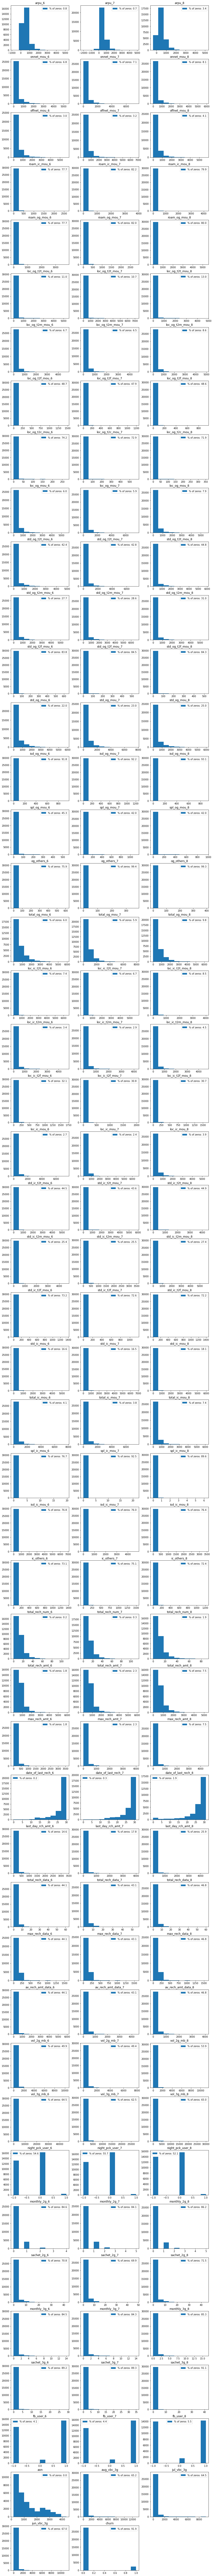

In [58]:
plt.figure(figsize=[15,200])
cols= list(tel_final_filled.columns)
for x,y in enumerate (cols):
    plt.subplot(48,3,(x+1))
    zeros= round((((tel_final_filled[y]==0).sum())/tel_final_filled.shape[0])*100,1)
    plt.hist(tel_final_filled[y],label=('% of zeros: {}'.format(zeros)))
    plt.title(y)
    plt.legend()
plt.show()

### Bivariate Analysis

In [59]:
def annotate(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


def var_bar(var):
    plt.figure(figsize=[17,5])
    plt.subplot(131) 
    ax= sns.barplot(x='churn',y= (var+'_6'),data=tel_final_filled,ci=None)
    annotate(ax)
    plt.subplot(132)
    ax=sns.barplot(x='churn',y= (var+'_7'),data=tel_final_filled,ci=None)
    annotate(ax)
    plt.subplot(133)
    ax=sns.barplot(x='churn',y= (var+'_8'),data=tel_final_filled,ci=None)
    annotate(ax)
    plt.suptitle(var + ' vs Churn',size=15)
    plt.show()

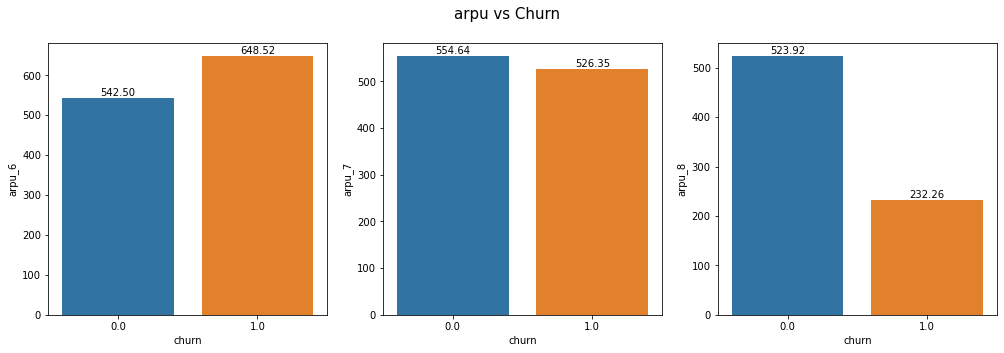

In [60]:
var_bar('arpu')

We could see the churned customers were giving good revenue in the begining. At the later stage, it was found that churned customers were not giving good revenue as compared to non-churn customer.

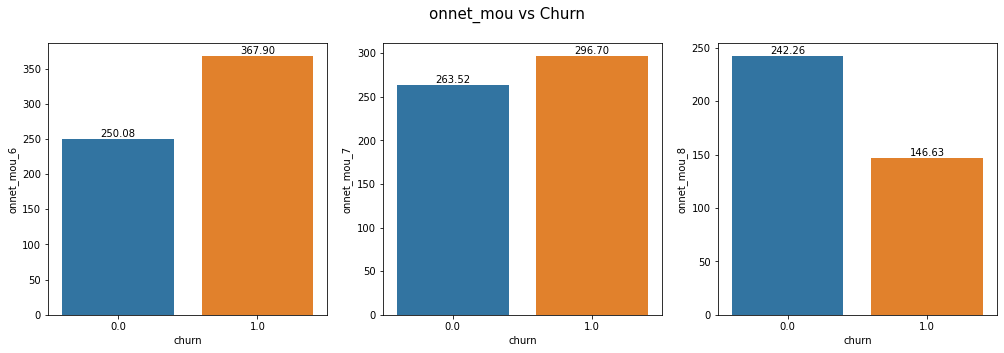

In [61]:
var_bar('onnet_mou')

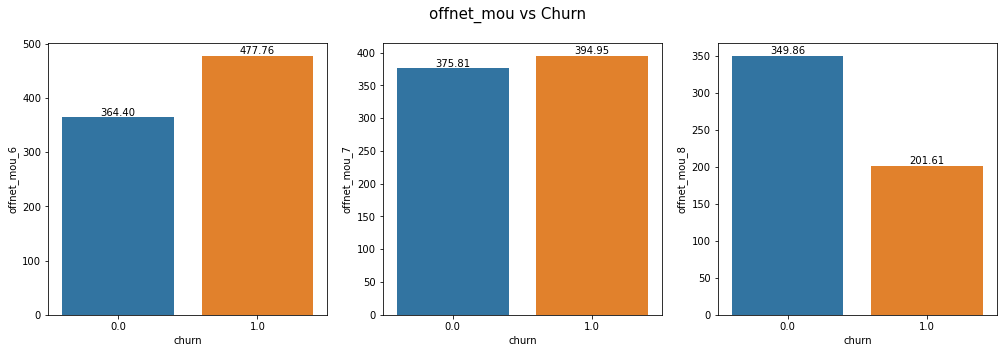

In [62]:
var_bar('offnet_mou')

We could see there is a steady decrease in `onne_mou` and `offnet_mou` from the month 6 to 8

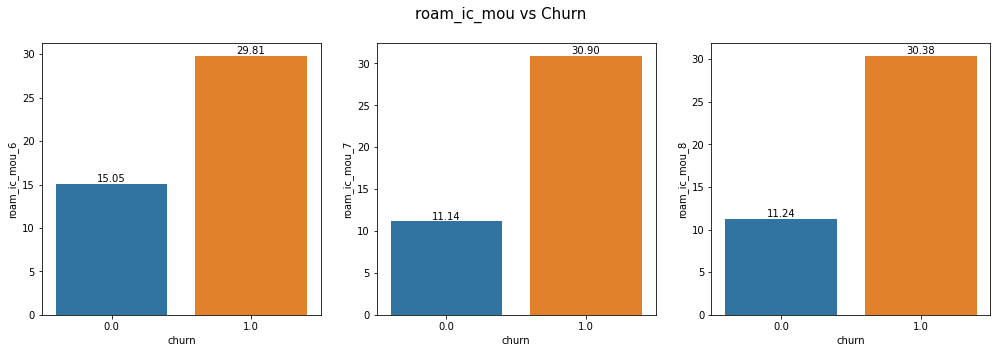

In [63]:
var_bar('roam_ic_mou')

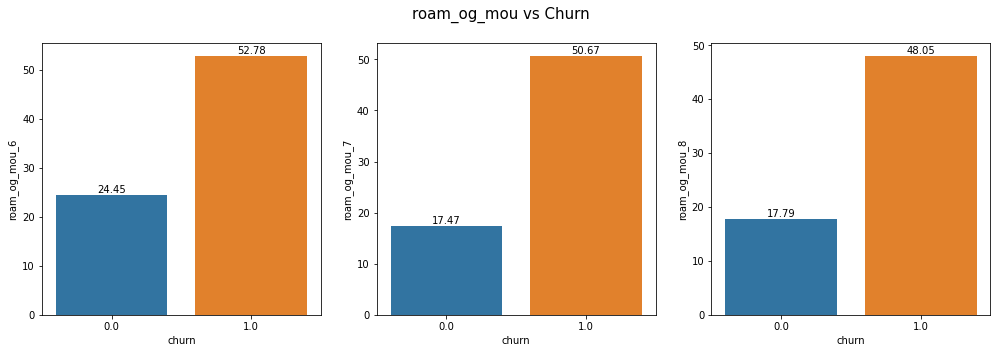

In [64]:
var_bar('roam_og_mou')

Churn customers tend to have more roam_ic_mou & roam_og_mou as compared to non-churn. All the months, the behaviour has been constant.

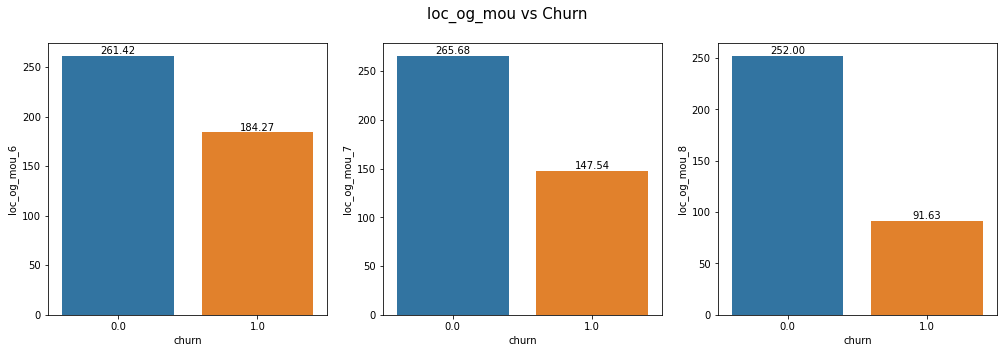

In [65]:
var_bar('loc_og_mou')

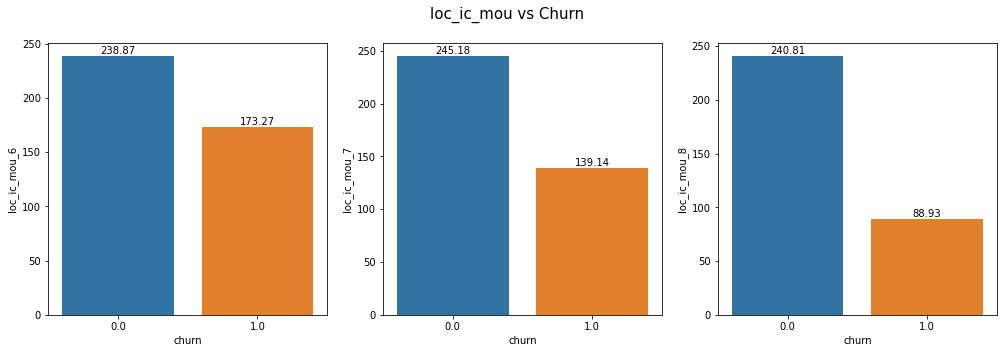

In [66]:
var_bar('loc_ic_mou')

There is a constant decrease in loc_ic_mou & loc_og_mou for churn customers. All the months, the behaviour has been constant.

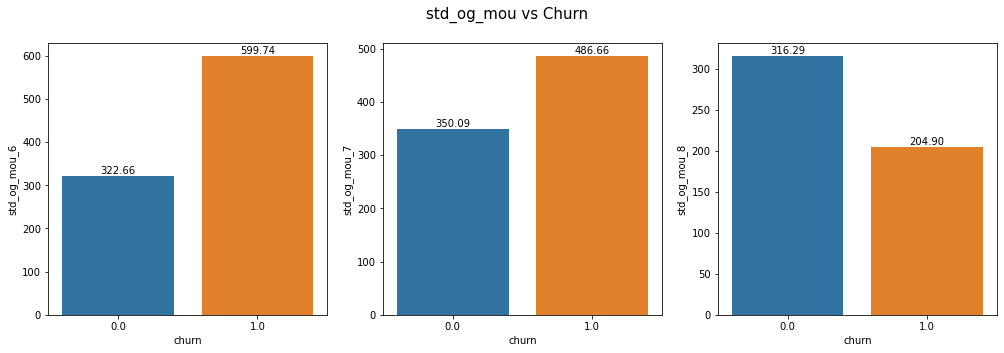

In [67]:
var_bar('std_og_mou')

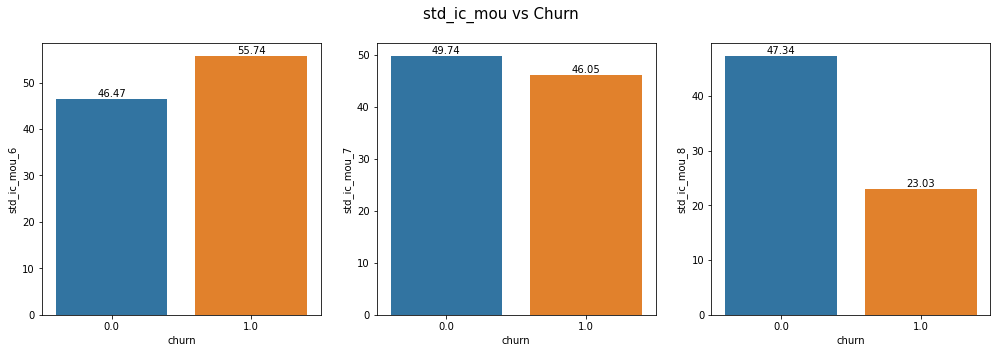

In [68]:
var_bar('std_ic_mou')

There is a constant decrease std_ic_mou & std_og_mou for churn customers. All the months, the behaviour has been constant.

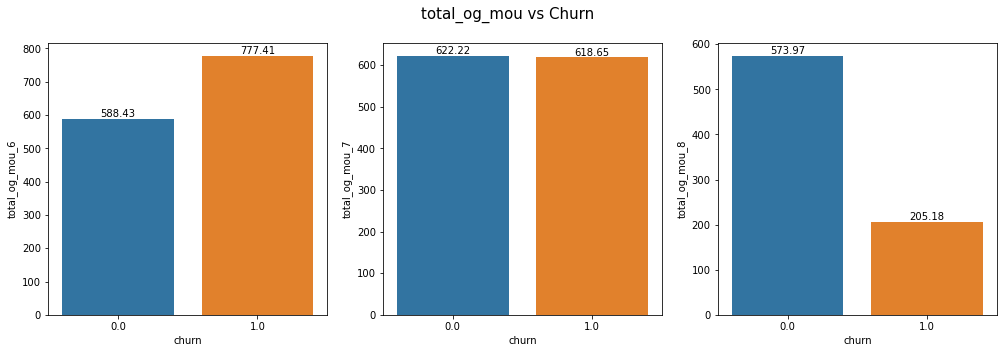

In [69]:
var_bar('total_og_mou')

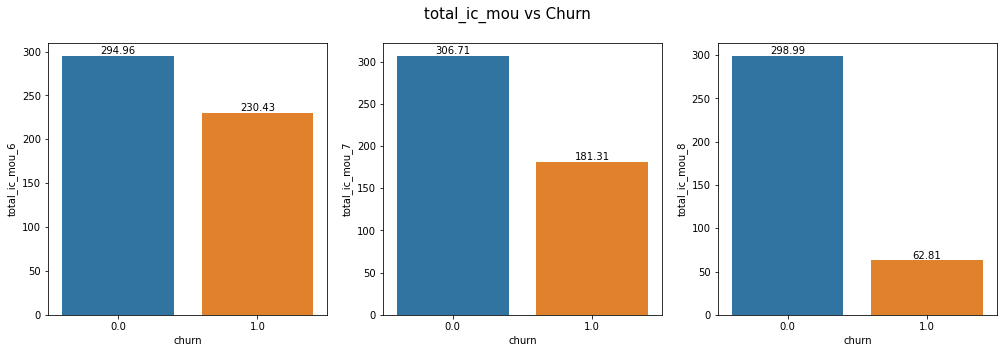

In [70]:
var_bar('total_ic_mou')

Total_ic_mou & total_og_mou have drastically decreased from month 6 to month 8 for churn customers.

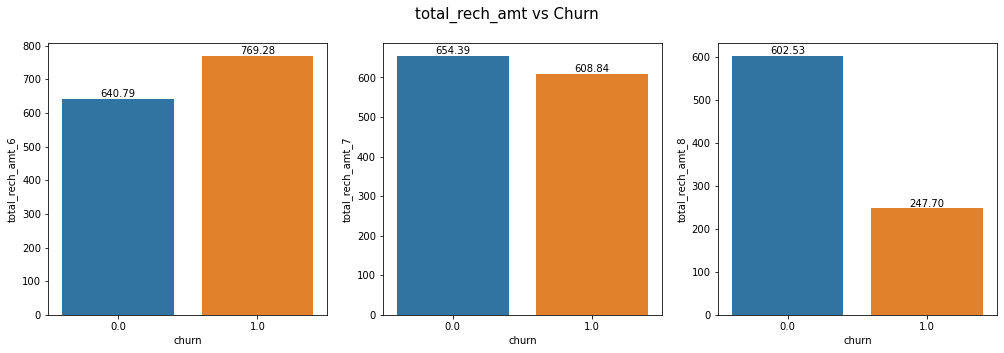

In [71]:
var_bar('total_rech_amt')

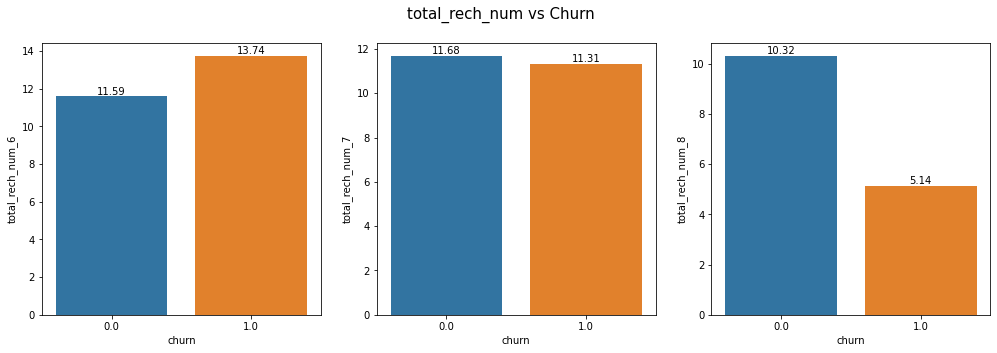

In [72]:
var_bar('total_rech_num')

`total_rech_amt` and `total_rech_num` are also decreasing over the period for churn customers.

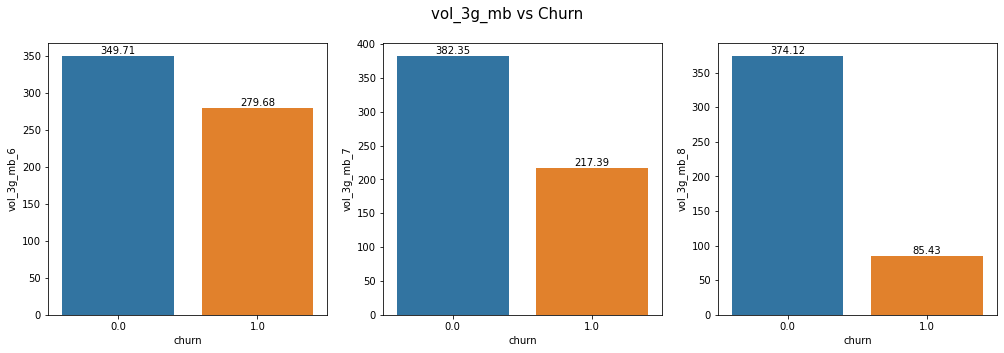

In [73]:
var_bar('vol_3g_mb')

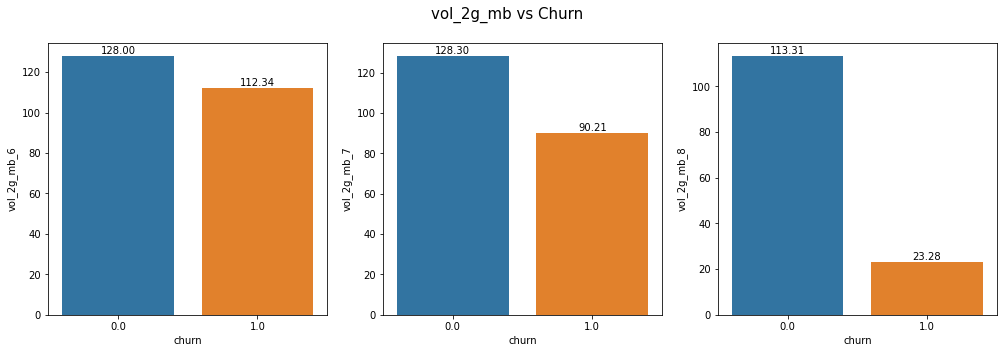

In [74]:
var_bar('vol_2g_mb')

There is a steady decrement when we move from month 6 to month 7. But there is a drastic decrease in the last month for 2G and 3G data uasge.

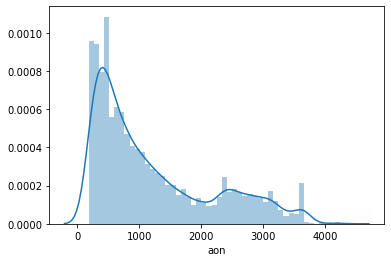

In [75]:
sns.distplot(tel_final_filled['aon'])

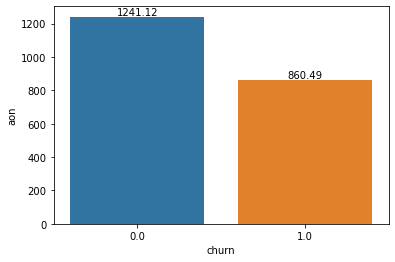

In [76]:
a=sns.barplot(x='churn',y= 'aon',data=tel_final_filled,ci=None)
annotate(a)
plt.show()

Churn customers are those who have recently joined the particular telecom network. People who have been using it for long are less likely to leave.

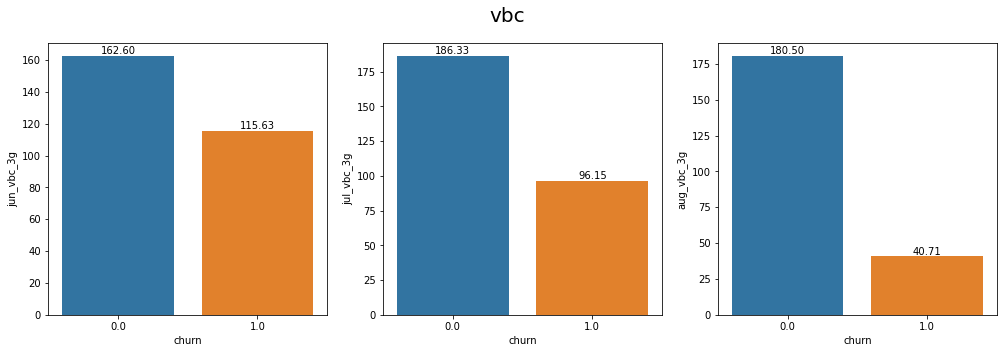

In [77]:
plt.figure(figsize=[17,5])
plt.subplot(131) 
ax=sns.barplot(x='churn',y= 'jun_vbc_3g',data=tel_final_filled,ci=None)
annotate(ax)
plt.subplot(132)
ax=sns.barplot(x='churn',y= 'jul_vbc_3g',data=tel_final_filled,ci=None)
annotate(ax)
plt.subplot(133)
ax=sns.barplot(x='churn',y= 'aug_vbc_3g',data=tel_final_filled,ci=None)
annotate(ax)
plt.suptitle('vbc',size=20)
plt.show()

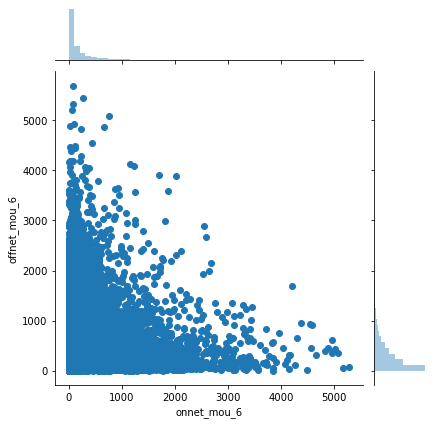

In [78]:
sns.jointplot(x='onnet_mou_6',y='offnet_mou_6',data=tel_final_filled)

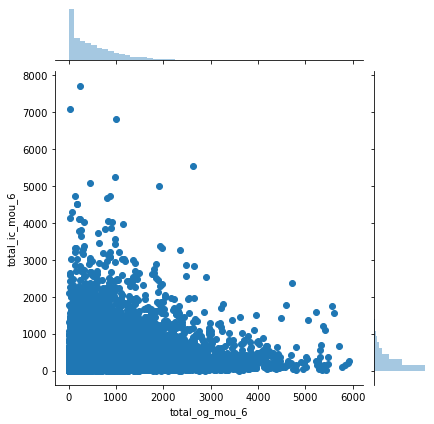

In [79]:
sns.jointplot(x='total_og_mou_6',y='total_ic_mou_6',data=tel_final_filled)

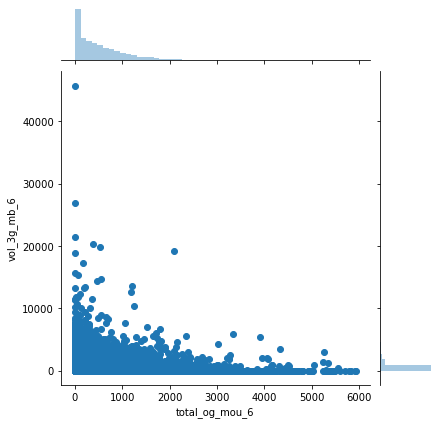

In [80]:
sns.jointplot(x='total_og_mou_6',y='vol_3g_mb_6',data=tel_final_filled) 

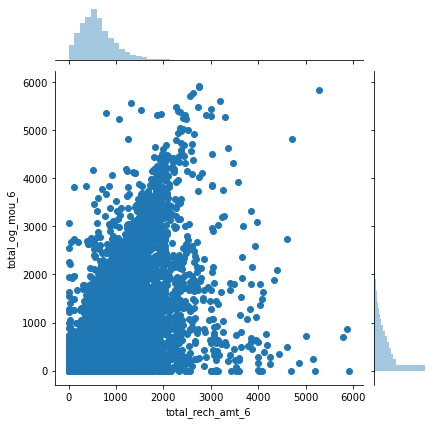

In [81]:
sns.jointplot(x='total_rech_amt_6',y='total_og_mou_6',data=tel_final_filled)

For moderate recharge amount, people tend to have high total_og_mou. This is due to some fixed charges for unlimited calls.

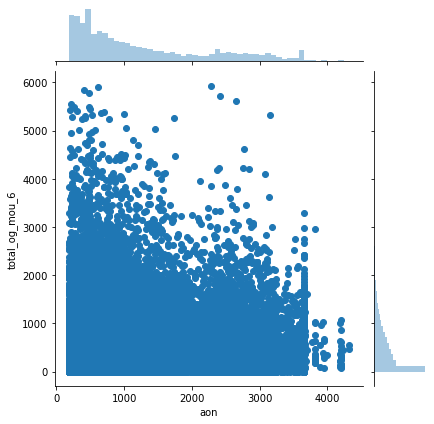

In [82]:
sns.jointplot(x='aon',y='total_og_mou_6',data=tel_final_filled)

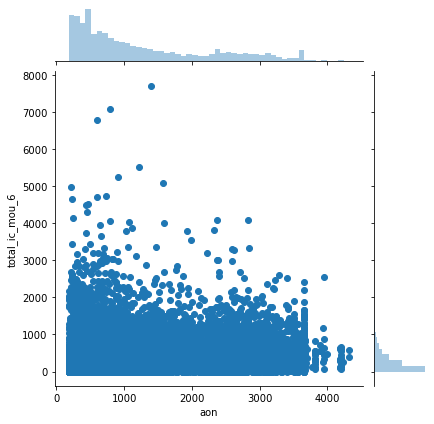

In [83]:
sns.jointplot(x='aon',y='total_ic_mou_6',data=tel_final_filled)

For very old customers we have less total_og_mou and total_ic_mou.

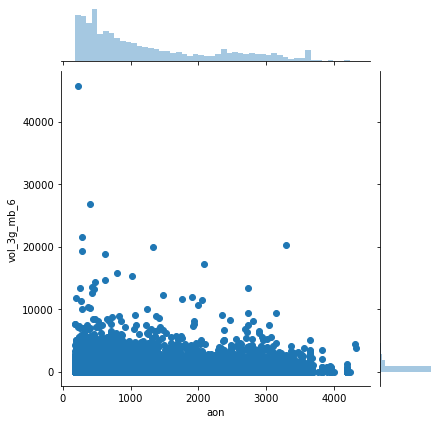

In [84]:
sns.jointplot(x='aon',y='vol_3g_mb_6',data=tel_final_filled)

In [85]:
tel_final_filled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,27.0,25.0,26.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1.0
2,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.

In [86]:
corr_col=[x for x in tel_final_filled.columns if '6' in x]
corr_col.extend(['jun_vbc_3g','aon'])
corr_df= tel_final_filled[corr_col]

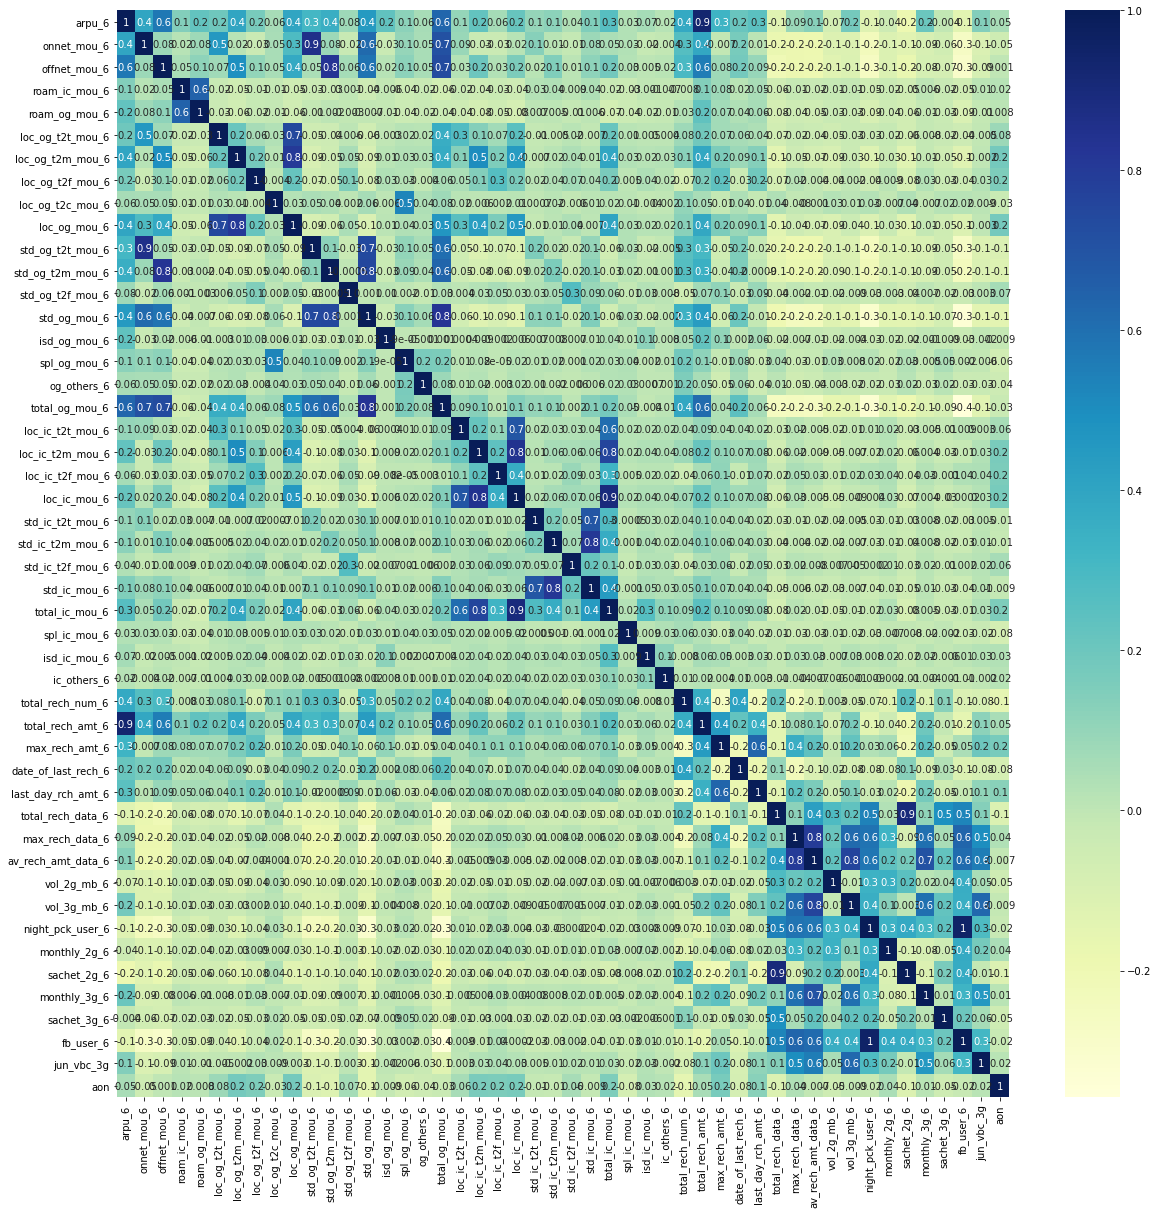

In [87]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.corr(),annot=True,fmt='.1g', cmap="YlGnBu")

Follwing pair of columns are highly correlated. The above graph is plotted for only month-6, but it is valid for rest of the months.

`arpu` and `total_rech_amt`

`std_og_t2t_mou` and `onnet_mou`

`std_og_t2m_mou` and `offnet_mou`

`loc_og_t2m_mou` and `loc_og_mou`

`std_og_mou` and `tot_og_mou`

`loc_ic_t2m_mou` and `loc_ic_mou`

`loc_ic_mou` and `tot_ic_mou`

`std_ic_t2m_mou` and `std_ic_mou`

## Feature Engineering

In [88]:
tel_final_filled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,27.0,25.0,26.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1.0
2,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.

In [89]:
tel_final_filled.shape

(29918, 143)

In [90]:
### Feature creation ####

## checked if a customer was roaming
tel_final_filled['was_roam_6'] = ((tel_final_filled['roam_ic_mou_6']!=0)|(tel_final_filled['roam_og_mou_6']!=0)).astype(int)
tel_final_filled['was_roam_7'] = ((tel_final_filled['roam_ic_mou_7']!=0)|(tel_final_filled['roam_og_mou_7']!=0)).astype(int)
tel_final_filled['was_roam_8'] = ((tel_final_filled['roam_ic_mou_7']!=0)|(tel_final_filled['roam_og_mou_8']!=0)).astype(int)

### Checking if average revenue is getting reduced ####
tel_final_filled['is_decrease_rev'] = ((tel_final_filled['arpu_6']>tel_final_filled['arpu_7'])&(tel_final_filled['arpu_7']>tel_final_filled['arpu_8'])).astype(int)
tel_final_filled['max_decrease_rev'] = 1-(tel_final_filled[['arpu_6','arpu_7','arpu_8']].min(axis=1)/tel_final_filled[['arpu_6','arpu_7','arpu_8']].max(axis=1))

## Most onnet or offnet call(chances are there if the offnet call>onnet)
tel_final_filled['max_off_net_6'] = (tel_final_filled['onnet_mou_6']<tel_final_filled['offnet_mou_6']).astype(int)
tel_final_filled['max_off_net_7'] = (tel_final_filled['onnet_mou_7']<tel_final_filled['offnet_mou_7']).astype(int)
tel_final_filled['max_off_net_8'] = (tel_final_filled['onnet_mou_8']<tel_final_filled['offnet_mou_8']).astype(int)

## t2c calls can be an influencer
tel_final_filled['dissatisfied_cust'] = (~((tel_final_filled['loc_og_t2c_mou_8']>=tel_final_filled['loc_og_t2c_mou_7'])&(tel_final_filled['loc_og_t2c_mou_7']>=tel_final_filled['loc_og_t2c_mou_6']))).astype(int)

In [91]:
tel_final_filled['av_rech_amt_6'] = round((tel_final_filled['total_rech_amt_6']/tel_final_filled['total_rech_num_6']),2)
tel_final_filled['av_rech_amt_7'] = round((tel_final_filled['total_rech_amt_7']/tel_final_filled['total_rech_num_7']),2)
tel_final_filled['av_rech_amt_8'] = round((tel_final_filled['total_rech_amt_8']/tel_final_filled['total_rech_num_8']),2)

In [92]:
tel_final_filled['av_rech_amt_6']= tel_final_filled['av_rech_amt_6'].fillna(0)
tel_final_filled['av_rech_amt_7']= tel_final_filled['av_rech_amt_7'].fillna(0)
tel_final_filled['av_rech_amt_8']= tel_final_filled['av_rech_amt_8'].fillna(0)

In [93]:
### Difference between 8 and (6 and 7 th month avg)

tel_final_filled['arpu_diff'] = tel_final_filled.arpu_8 - ((tel_final_filled.arpu_6 + tel_final_filled.arpu_7)/2)
tel_final_filled['onnet_mou_diff'] = tel_final_filled.onnet_mou_8 - ((tel_final_filled.onnet_mou_6 + tel_final_filled.onnet_mou_7)/2)
tel_final_filled['offnet_mou_diff'] = tel_final_filled.offnet_mou_8 - ((tel_final_filled.offnet_mou_6 + tel_final_filled.offnet_mou_7)/2)
tel_final_filled['roam_ic_mou_diff'] = tel_final_filled.roam_ic_mou_8 - ((tel_final_filled.roam_ic_mou_6 + tel_final_filled.roam_ic_mou_7)/2)
tel_final_filled['roam_og_mou_diff'] = tel_final_filled.roam_og_mou_8 - ((tel_final_filled.roam_og_mou_6 + tel_final_filled.roam_og_mou_7)/2)
tel_final_filled['loc_og_mou_diff'] = tel_final_filled.loc_og_mou_8 - ((tel_final_filled.loc_og_mou_6 + tel_final_filled.loc_og_mou_7)/2)
tel_final_filled['std_og_mou_diff'] = tel_final_filled.std_og_mou_8 - ((tel_final_filled.std_og_mou_6 + tel_final_filled.std_og_mou_7)/2)
tel_final_filled['isd_og_mou_diff'] = tel_final_filled.isd_og_mou_8 - ((tel_final_filled.isd_og_mou_6 + tel_final_filled.isd_og_mou_7)/2)
tel_final_filled['spl_og_mou_diff'] = tel_final_filled.spl_og_mou_8 - ((tel_final_filled.spl_og_mou_6 + tel_final_filled.spl_og_mou_7)/2)
tel_final_filled['total_og_mou_diff'] = tel_final_filled.total_og_mou_8 - ((tel_final_filled.total_og_mou_6 + tel_final_filled.total_og_mou_7)/2)
tel_final_filled['loc_ic_mou_diff'] = tel_final_filled.loc_ic_mou_8 - ((tel_final_filled.loc_ic_mou_6 + tel_final_filled.loc_ic_mou_7)/2)
tel_final_filled['std_ic_mou_diff'] = tel_final_filled.std_ic_mou_8 - ((tel_final_filled.std_ic_mou_6 + tel_final_filled.std_ic_mou_7)/2)
tel_final_filled['isd_ic_mou_diff'] = tel_final_filled.isd_ic_mou_8 - ((tel_final_filled.isd_ic_mou_6 + tel_final_filled.isd_ic_mou_7)/2)
tel_final_filled['spl_ic_mou_diff'] = tel_final_filled.spl_ic_mou_8 - ((tel_final_filled.spl_ic_mou_6 + tel_final_filled.spl_ic_mou_7)/2)
tel_final_filled['total_ic_mou_diff'] = tel_final_filled.total_ic_mou_8 - ((tel_final_filled.total_ic_mou_6 + tel_final_filled.total_ic_mou_7)/2)
tel_final_filled['total_rech_num_diff'] = tel_final_filled.total_rech_num_8 - ((tel_final_filled.total_rech_num_6 + tel_final_filled.total_rech_num_7)/2)
tel_final_filled['total_rech_amt_diff'] = tel_final_filled.total_rech_amt_8 - ((tel_final_filled.total_rech_amt_6 + tel_final_filled.total_rech_amt_7)/2)
tel_final_filled['max_rech_amt_diff'] = tel_final_filled.max_rech_amt_8 - ((tel_final_filled.max_rech_amt_6 + tel_final_filled.max_rech_amt_7)/2)
tel_final_filled['total_rech_data_diff'] = tel_final_filled.total_rech_data_8 - ((tel_final_filled.total_rech_data_6 + tel_final_filled.total_rech_data_7)/2)
tel_final_filled['max_rech_data_diff'] = tel_final_filled.max_rech_data_8 - ((tel_final_filled.max_rech_data_6 + tel_final_filled.max_rech_data_7)/2)
tel_final_filled['av_rech_amt_data_diff'] = tel_final_filled.av_rech_amt_data_8 - ((tel_final_filled.av_rech_amt_data_6 + tel_final_filled.av_rech_amt_data_7)/2)
tel_final_filled['av_rech_amt_diff'] = tel_final_filled.av_rech_amt_8 - ((tel_final_filled.av_rech_amt_6 + tel_final_filled.av_rech_amt_7)/2)
tel_final_filled['vol_2g_mb_diff'] = tel_final_filled.vol_2g_mb_8 - ((tel_final_filled.vol_2g_mb_6 + tel_final_filled.vol_2g_mb_7)/2)
tel_final_filled['vol_3g_mb_diff'] = tel_final_filled.vol_3g_mb_8 - ((tel_final_filled.vol_3g_mb_6 + tel_final_filled.vol_3g_mb_7)/2)

In [94]:
tel_final_filled['total_data_rech_amt_6'] = tel_final_filled['total_rech_data_6'] * tel_final_filled['av_rech_amt_data_6']
tel_final_filled['total_data_rech_amt_7'] = tel_final_filled['total_rech_data_7'] * tel_final_filled['av_rech_amt_data_7']
tel_final_filled['total_data_rech_amt_8'] = tel_final_filled['total_rech_data_8'] * tel_final_filled['av_rech_amt_data_8']

tel_final_filled['tot_rech_6'] = tel_final_filled['total_rech_amt_6'] + tel_final_filled['total_data_rech_amt_6']
tel_final_filled['tot_rech_7'] = tel_final_filled['total_rech_amt_7'] + tel_final_filled['total_data_rech_amt_7']
tel_final_filled['tot_rech_8'] = tel_final_filled['total_rech_amt_8'] + tel_final_filled['total_data_rech_amt_8']

In [95]:
tel_final_filled['recharged_day_diff_6_7'] = tel_final_filled['date_of_last_rech_7'] - tel_final_filled['date_of_last_rech_6']
tel_final_filled['recharged_day_diff_7_8'] = tel_final_filled['date_of_last_rech_8'] - tel_final_filled['date_of_last_rech_7']

tel_final_filled.drop(['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)

In [96]:
tel_final_filled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,was_roam_6,was_roam_7,was_roam_8,is_decrease_rev,max_decrease_rev,max_off_net_6,max_off_net_7,max_off_net_8,dissatisfied_cust,av_rech_amt_6,av_rech_amt_7,av_rech_amt_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,av_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tot_rech_6,tot_rech_7,tot_rech_8,recharged_day_diff_6_7,recharged_day_diff_7_8
0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0,1,0,0,0,0.08,1,1,0,1,90.50,84.00,126.00,7.70,-21.60,-163.26,-4.86,-7.48,-74.34,-75.72,-2.27e+01,-6.23,0.00,-88.24,-29.97,-3.38,-0.05,5.44,-1.5,-55.0,0.0,0.0,0.0,0.0,38.75,-9.97,-7.55,252.0,252.0,252.0,614.0,504.0,504.0,-5.0,-8.0
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.

In [97]:
tel_final_filled.describe(include='all',percentiles=[.05,.10,.25, .5, .75, .9, .95, 0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,was_roam_6,was_roam_7,was_roam_8,is_decrease_rev,max_decrease_rev,max_off_net_6,max_off_net_7,max_off_net_8,dissatisfied_cust,av_rech_amt_6,av_rech_amt_7,av_rech_amt_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,av_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tot_rech_6,tot_rech_7,tot_rech_8,recharged_day_diff_6_7,recharged_day_diff_7_8
count,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,29918.00,2.99e+04,29918.00,29918.00,29918.00,29918.

In [98]:
tel_final_filled.shape

(29918, 184)

In [99]:
tel_final_filled.isnull().sum().sum()

0

## Data Preparation

In [100]:
df=tel_final_filled.copy()

In [101]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,was_roam_6,was_roam_7,was_roam_8,is_decrease_rev,max_decrease_rev,max_off_net_6,max_off_net_7,max_off_net_8,dissatisfied_cust,av_rech_amt_6,av_rech_amt_7,av_rech_amt_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,av_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tot_rech_6,tot_rech_7,tot_rech_8,recharged_day_diff_6_7,recharged_day_diff_7_8
0,197.38,214.82,213.80,27.61,15.59,0.00,176.89,149.63,0.00,9.72,0.00,0.00,14.96,0.00,0.00,19.23,9.79,0.00,64.34,49.42,0.00,3.27,2.61,0.00,0.0,0.28,0.00,86.85,61.82,0.00,6.51,5.80,0.00,54.92,61.24,0.00,15.97,6.99,0.00,77.41,74.03,0.00,23.51,21.80,0.00,2.21,10.24,0.00,0.27,0.0,0.0,0.00,0.00,0.00,26.35,31.38,0.16,60.50,53.56,4.13,11.42,4.15,1.15,98.27,89.10,5.44,8.15,2.39,0.00,25.21,23.92,0.00,0.26,0.00,0.00,33.62,26.32,0.00,0.00,0.00,5.44,0.10,0.0,0.0,0.40,6.36,0.00,1.32,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0,1,0,0,0,0.08,1,1,0,1,90.50,84.00,126.00,7.70,-21.60,-163.26,-4.86,-7.48,-74.34,-75.72,-2.27e+01,-6.23,0.00,-88.24,-29.97,-3.38,-0.05,5.44,-1.5,-55.0,0.0,0.0,0.0,0.0,38.75,-9.97,-7.55,252.0,252.0,252.0,614.0,504.0,504.0,-5.0,-8.0
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.

In [102]:
df.shape

(29918, 184)

In [103]:
df.churn.mean()*100

8.11551574303095

In [104]:
tel_final_filled.info('all',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29918 entries, 0 to 29917
Data columns (total 184 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   arpu_6                  29918 non-null  float64
 1   arpu_7                  29918 non-null  float64
 2   arpu_8                  29918 non-null  float64
 3   onnet_mou_6             29918 non-null  float64
 4   onnet_mou_7             29918 non-null  float64
 5   onnet_mou_8             29918 non-null  float64
 6   offnet_mou_6            29918 non-null  float64
 7   offnet_mou_7            29918 non-null  float64
 8   offnet_mou_8            29918 non-null  float64
 9   roam_ic_mou_6           29918 non-null  float64
 10  roam_ic_mou_7           29918 non-null  float64
 11  roam_ic_mou_8           29918 non-null  float64
 12  roam_og_mou_6           29918 non-null  float64
 13  roam_og_mou_7           29918 non-null  float64
 14  roam_og_mou_8           29918 non-nul

## Splitting the Data into Training and Testing Sets

We will split the dataset into 70 and 30 for training and testing data.

In [105]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 60)

In [106]:
df_train.shape

(20942, 184)

In [107]:
df_train.churn.mean()*100

8.122433387451055

In [108]:
df_test.shape

(8976, 184)

In [109]:
df_test.churn.mean()*100

8.099376114081997

In [110]:
##Target encoding the binary variables.
cat_col = ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8','was_roam_6','was_roam_7','was_roam_8','is_decrease_rev','max_off_net_6','max_off_net_7',
           'max_off_net_8','dissatisfied_cust']
imputing_dict = {}

for col in cat_col:
        imputing_dict[col] =  df_train.groupby(col)['churn'].mean().to_dict()

imputing_dict['night_pck_user_6']

{-1.0: 0.09881637528504723, 0.0: 0.06699275045855534, 1.0: 0.08450704225352113}

In [111]:
df_train.replace(imputing_dict, inplace = True)
df_test.replace(imputing_dict, inplace = True)

### Dividing into X and Y sets for the model building

In [112]:
y_train = df_train.pop('churn')
y_test= df_test.pop('churn')
X_train = df_train
X_test= df_test

In [113]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,was_roam_6,was_roam_7,was_roam_8,is_decrease_rev,max_decrease_rev,max_off_net_6,max_off_net_7,max_off_net_8,dissatisfied_cust,av_rech_amt_6,av_rech_amt_7,av_rech_amt_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,av_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tot_rech_6,tot_rech_7,tot_rech_8,recharged_day_diff_6_7,recharged_day_diff_7_8
20995,689.00,1226.91,896.97,289.81,260.06,68.21,1102.69,1938.99,878.53,0.0,3.90,30.46,15.73,60.33,189.33,5.49,14.91,15.21,880.86,1646.13,584.34,0.30,0.10,0.00,0.00,3.70,0.81,886.66,1661.14,599.56,283.96,244.24,50.74,206.14,217.46,79.41,0.0,0.0,0.0,490.11,461.71,130.16,0.0,0.0,0.0,3.86,32.91,30.39,0.00,0.0,0.0,1380.64,2155.78,760.13,3.96,9.91,10.96,202.39,388.86,89.84,7.79,4.69,0.00,214.16,403.48,100.81,70.73,15.46,17.51,33.58,42.23,29.33,0.0,0.00,0.0,104.31,57.69,46.84,339.94,487.29,147.66,0.00,0.00,0.0,21.46,18.54,0.00,0.00,7.56,0.00,21.0,53.0,31.0,833.0,1365.0,1071.0,110.0,110.0,130.0,50.0,20.0,50.0,0.0,1.0,5.0,0.0,9.0,25.0,0.0,9.0,117.0,0.00,8.74,121.68,0.00,0.00,0.00,0.10,0.06,0.03,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.06,0.02,598.0,0.00,0.00,0.00,0.11,0.18,0.20,0.06,0.44,0.07,0.07,0.07,0.10,39.67,25.75,34.55,-60.99,-206.73,-642.31,28.51,151.30,-674.34,-345.75,0.0,12.01,-1008.08,-208.01,-34.16,-20.00,0.00,-265.96,-6.0,-28.0,20.0,4.5,20.5,112.5,1.84,117.31,0.00,0.0,9.0,585.0,833.0,1374.0,1656.0,1.0,0.0
5792,335.76,377.27,351.14,24.99,61.78,61.44,97.96,80.64,97.71,0.0,0.00,0.00,0.00,0.00,0.00,24.99,61.78,61.44,97.91,74.98,97.58,0.00,1.14,0.13,0.00,4.26,0.00,122.91,137.91,159.16,0.00,0.00,0.00,0.05,0.25,0.00,0.0,0.0,0.0,0.

In [114]:
y_train[:10]

20995    0.0
5792     0.0
2326     0.0
10176    0.0
20432    0.0
9709     0.0
26923    0.0
9751     0.0
2957     0.0
26758    0.0
Name: churn, dtype: float64

## Rescaling the Features 

We will use standard scaler for this problem. Converting all varibales into standard scaling as there is no binary class variable.

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [116]:
scaler.fit(X_train)

StandardScaler()

In [117]:
cols= X_train.columns
X_train[cols]= scaler.transform(X_train[cols])
X_test[cols]= scaler.transform(X_test[cols])

In [118]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,was_roam_6,was_roam_7,was_roam_8,is_decrease_rev,max_decrease_rev,max_off_net_6,max_off_net_7,max_off_net_8,dissatisfied_cust,av_rech_amt_6,av_rech_amt_7,av_rech_amt_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,av_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,tot_rech_6,tot_rech_7,tot_rech_8,recharged_day_diff_6_7,recharged_day_diff_7_8
count,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.09e+04,2.0

In [119]:
X_test.isnull().sum().sum()

0

In [120]:
X_test.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8976 entries, 22951 to 20030
Data columns (total 183 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   arpu_6                  float64
 1   arpu_7                  float64
 2   arpu_8                  float64
 3   onnet_mou_6             float64
 4   onnet_mou_7             float64
 5   onnet_mou_8             float64
 6   offnet_mou_6            float64
 7   offnet_mou_7            float64
 8   offnet_mou_8            float64
 9   roam_ic_mou_6           float64
 10  roam_ic_mou_7           float64
 11  roam_ic_mou_8           float64
 12  roam_og_mou_6           float64
 13  roam_og_mou_7           float64
 14  roam_og_mou_8           float64
 15  loc_og_t2t_mou_6        float64
 16  loc_og_t2t_mou_7        float64
 17  loc_og_t2t_mou_8        float64
 18  loc_og_t2m_mou_6        float64
 19  loc_og_t2m_mou_7        float64
 20  loc_og_t2m_mou_8        float64
 21  loc_og_t2f_mou_6        float64

# Building our model

## PCA

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca= PCA(random_state=50)

In [124]:
pca.fit(X_train)

PCA(random_state=50)

In [125]:
pca.components_

array([[-1.16120865e-01, -1.20913260e-01, -9.77892252e-02, ...,
         5.94471743e-02,  1.30684783e-02,  1.75374736e-03],
       [ 9.78156360e-02,  1.22862287e-01,  1.61504290e-01, ...,
         1.06788880e-01,  2.12449445e-02,  1.78544220e-02],
       [ 5.10530997e-02,  1.14449192e-01,  1.51358040e-01, ...,
         1.69402904e-01,  2.53423030e-02,  3.72017062e-02],
       ...,
       [-0.00000000e+00,  8.96092621e-17, -3.22883308e-17, ...,
         2.35353904e-02, -6.93889390e-18,  2.08166817e-17],
       [ 0.00000000e+00, -3.90095942e-16,  3.03367879e-16, ...,
        -1.32792974e-01,  3.46944695e-18, -4.51028104e-17],
       [ 0.00000000e+00, -4.28476699e-16,  4.14433912e-17, ...,
        -6.22022019e-03, -2.77555756e-17, -6.93889390e-18]])

In [126]:
pca.explained_variance_

array([1.72350224e+01, 1.41366625e+01, 9.89538576e+00, 8.18654573e+00,
       7.80714748e+00, 5.98038745e+00, 5.70013918e+00, 4.48626608e+00,
       4.33834933e+00, 3.79865459e+00, 3.55375076e+00, 3.37373969e+00,
       3.17794602e+00, 2.99695067e+00, 2.93021744e+00, 2.87300372e+00,
       2.81651871e+00, 2.61065179e+00, 2.53000845e+00, 2.48788642e+00,
       2.35282464e+00, 2.26952653e+00, 2.15936336e+00, 2.05458494e+00,
       1.95561105e+00, 1.85935536e+00, 1.81532451e+00, 1.78688757e+00,
       1.75287289e+00, 1.71360378e+00, 1.66676240e+00, 1.64007364e+00,
       1.54237513e+00, 1.49643719e+00, 1.43338656e+00, 1.41538854e+00,
       1.38599371e+00, 1.35996155e+00, 1.34749957e+00, 1.31371890e+00,
       1.25295452e+00, 1.19769813e+00, 1.18036162e+00, 1.16625811e+00,
       1.13606295e+00, 1.12046276e+00, 1.01290567e+00, 9.87239584e-01,
       9.46667690e-01, 8.90377154e-01, 8.84316769e-01, 8.66913966e-01,
       8.30531826e-01, 8.23845884e-01, 8.06159293e-01, 7.60958815e-01,
      

In [127]:
pca.explained_variance_ratio_

array([9.41759529e-02, 7.72458332e-02, 5.40705642e-02, 4.47330864e-02,
       4.26599710e-02, 3.26781523e-02, 3.11468142e-02, 2.45139446e-02,
       2.37056949e-02, 2.07566841e-02, 1.94184758e-02, 1.84348557e-02,
       1.73649960e-02, 1.63759976e-02, 1.60113526e-02, 1.56987242e-02,
       1.53900777e-02, 1.42651756e-02, 1.38245226e-02, 1.35943586e-02,
       1.28563513e-02, 1.24011921e-02, 1.17992363e-02, 1.12267040e-02,
       1.06858889e-02, 1.01599266e-02, 9.91933239e-03, 9.76394668e-03,
       9.57808302e-03, 9.36350794e-03, 9.10755635e-03, 8.96172310e-03,
       8.42787693e-03, 8.17686191e-03, 7.83233941e-03, 7.73399429e-03,
       7.57337445e-03, 7.43112901e-03, 7.36303404e-03, 7.17844902e-03,
       6.84641908e-03, 6.54448603e-03, 6.44975548e-03, 6.37269083e-03,
       6.20769781e-03, 6.12245498e-03, 5.53473936e-03, 5.39449422e-03,
       5.17280047e-03, 4.86521660e-03, 4.83210132e-03, 4.73700858e-03,
       4.53820857e-03, 4.50167511e-03, 4.40503168e-03, 4.15804633e-03,
      

In [128]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [129]:
for i,val in enumerate(var_cumu):
    print(f"{i}: {val}")

0: 0.09417595291056662
1: 0.17142178611853004
2: 0.2254923502952687
3: 0.2702254367257206
4: 0.3128854076830924
5: 0.3455635600150719
6: 0.37671037419806974
7: 0.40122431874823333
8: 0.4249300136713832
9: 0.44568669781626413
10: 0.46510517357317627
11: 0.483540029239875
12: 0.500905025272108
13: 0.5172810228668939
14: 0.5332923754190032
15: 0.5489910996156158
16: 0.5643811773027344
17: 0.5786463528903002
18: 0.5924708755075643
19: 0.6060652341033318
20: 0.6189215854426564
21: 0.63132277755466
22: 0.6431220138986276
23: 0.6543487178722195
24: 0.6650346067828662
25: 0.6751945334093111
26: 0.6851138658039871
27: 0.6948778124832032
28: 0.7044558955005831
29: 0.7138194034380043
30: 0.7229269597910284
31: 0.7318886828925548
32: 0.7403165598259959
33: 0.7484934217367093
34: 0.7563257611449014
35: 0.7640597554316028
36: 0.7716331298806139
37: 0.7790642588858003
38: 0.7864272929279378
39: 0.7936057419454496
40: 0.8004521610217655
41: 0.8069966470500529
42: 0.8134464025325993
43: 0.8198190933607

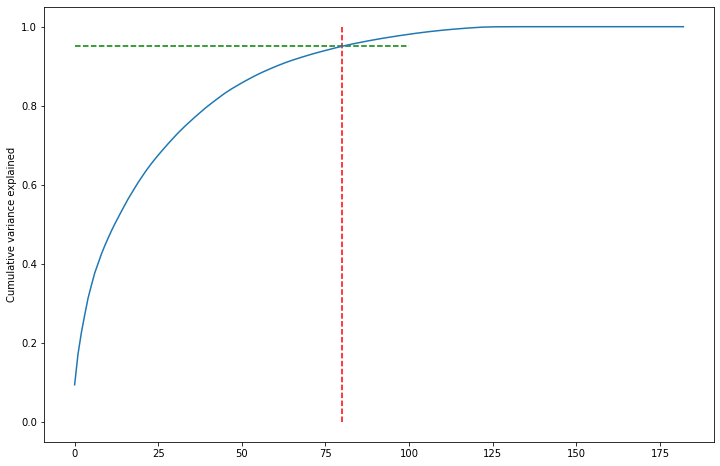

In [130]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From the above scree-plot, we can take 80 PCs to define 95% of the variance.

In [131]:
pca= PCA(n_components=80, random_state=50)

In [133]:
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [134]:
X_train_pca.shape

(20942, 80)

In [135]:
X_test_pca.shape

(8976, 80)

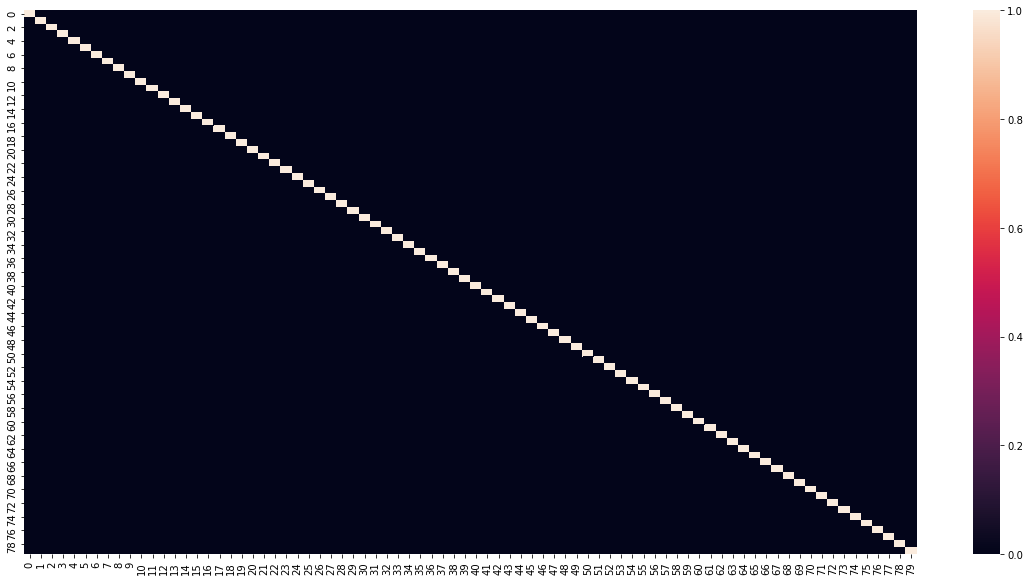

In [136]:
pca_corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize = (20,10))
sns.heatmap(pca_corrmat,annot = False)

### The corraltions are ~ zero after doing the PCA

# Logistics Regression with PCA

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score, confusion_matrix,classification_report,roc_curve

In [ ]:
# hyperparameter tuning with logreg

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'C': [0.001,0.01,0.1,1,100]}         


# specify model
lm = LogisticRegression(penalty='l1',class_weight='balanced',solver = 'liblinear')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
model_cv.fit(X_train_pca, y_train)       

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
plt.figure(figsize=(16,6))
df=cv_results.copy()
plt.plot(df["param_C"], df["mean_test_score"])
plt.plot(df["param_C"], df["mean_train_score"])
plt.xlabel('C')
plt.ylabel('AUC')
plt.xscale('log')
plt.legend(['test score', 'train score'], loc='upper left')

Based on the above plot, we can select the hyperparametre C as 0.1.

In [138]:
lm = LogisticRegression(penalty='l1',C=0.1,class_weight='balanced',solver = 'liblinear')
lm.fit(X_train_pca, y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [139]:
y_train_pca= lm.predict_proba(X_train_pca)
y_test_pca= lm.predict_proba(X_test_pca)

In [140]:
print('train ROC is', roc_auc_score(y_train,y_train_pca[:,1]))

train ROC is 0.9077313256178988


In [141]:
print( 'test ROC is', roc_auc_score(y_test,y_test_pca[:,1]))

test ROC is 0.9074926009121527


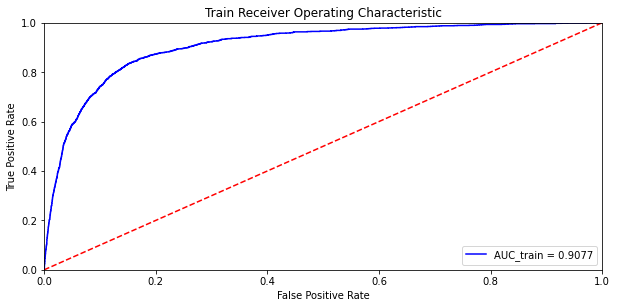

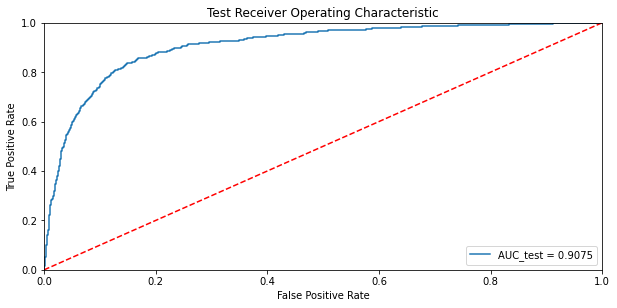

In [142]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train,y_train_pca[:,1])
fpr_test, tpr_test, threshold_test = roc_curve(y_test,y_test_pca[:,1])

roc_auc_train = roc_auc_score(y_train,y_train_pca[:,1])
roc_auc_test = roc_auc_score(y_test,y_test_pca[:,1])

# method I: plt
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b',label = 'AUC_train = %0.4f' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title('Test Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test,label = 'AUC_test = %0.4f' % roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


Checking the KS-Statistic.

In [143]:
def ks_statistic(score,dv,n_bins=10,good=[0],bin_cuts=False,bins=None,dv_names=['good','bad'],rate_calc=1,asc_sort=True):
    ''' assumes 0 as good and 1 as bad
        needs numpy package also
        dv_names in order of good and bad
        rate_calc- to calc good/bad rate and its cum'''
    data = pd.DataFrame({'score':score,'dv':dv})
    data[dv_names[0]] = (data['dv'].isin(good)).astype(np.int64)
    data[dv_names[1]] = 1-data[dv_names[0]]
    # data['bucket'] = pd.qcut(data.score, 10) #causing error
    if not bin_cuts:
        bins = pd.core.algorithms.quantile(data['score'], np.linspace(0, 1, n_bins+1))
        if len(set(bins))<=n_bins:
            bins = pd.core.algorithms.quantile(np.unique(data['score']), np.linspace(0, 1, n_bins+1))
    else:
        bins = bins
    #data['bucket'] = pd.tools.tile._bins_to_cuts(data['score'], bins, include_lowest=True)
    data['bucket'] = pd.cut(data['score'],bins,include_lowest=True)
    grouped = data.groupby('bucket', as_index = False)
    agg1 = pd.DataFrame({'min_scr':grouped.min().score})
    agg1['max_scr'] = grouped.max().score
    agg1[dv_names[0]] = grouped.sum()[dv_names[0]]
    agg1[dv_names[1]] = grouped.sum()[dv_names[1]]
    agg1['total'] = agg1[dv_names[1]] + agg1[dv_names[0]]
    agg2 = (agg1.sort_index(level = ['min_scr'],ascending=asc_sort)).reset_index(drop = True)
    #agg2['good_to_bad_odds'] = (agg2.goods / agg2.bads).apply('{0:.2f}'.format)
    agg2['{}_rate'.format(dv_names[1])] = (agg2[dv_names[1]] / agg2.total).apply('{0:.2f}'.format)
    agg2['{}_rate'.format(dv_names[0])] = agg2[dv_names[0]] / agg2.total
    agg2['cum_pop'] = agg2.total.cumsum() / agg2.total.sum()
    agg2['cum_{}_pct'.format(dv_names[0])] = agg2[dv_names[0]].cumsum() / agg2[dv_names[0]].sum()
    agg2['cum_{}_pct'.format(dv_names[1])] = agg2[dv_names[1]].cumsum() / agg2[dv_names[1]].sum()
    agg2['ks'] = np.round((agg2['cum_{}_pct'.format(dv_names[1])] - agg2['cum_{}_pct'.format(dv_names[0])]), 4) * 100
    flag = lambda x: '<----' if abs(x) == agg2.ks.abs().max() else ''
    agg2['max_ks'] = agg2.ks.apply(flag)
    return agg2 

def calculate_max_ks(score,dv,good):
    data = pd.DataFrame({'score':score,'dv':dv})
    data['good'] = (data['dv'].isin(good)).astype(np.int64)
    data['bad'] = 1-data['good']
    data = data.sort_values('score')
    data.reset_index(inplace=True,drop=True)
    data['bads'] = data.bad.cumsum()
    data['goods'] = data.good.cumsum()
    data['cum_good_pct'] = data.good.cumsum() / data.good.sum()
    data['cum_bad_pct'] = data.bad.cumsum() / data.bad.sum()
    data['ks'] = data['cum_good_pct']-data['cum_bad_pct']
    return data.ks.abs().max()*100

In [144]:
dv_names = ["Not churn","Churn"]

In [145]:
print("train")
ks_statistic(y_train_pca[:,1],y_train.values,good=[0],dv_names=dv_names,rate_calc=1,asc_sort=False)

train


,min_scr,max_scr,Not churn,Churn,total,Churn_rate,Not churn_rate,cum_pop,cum_Not churn_pct,cum_Churn_pct,ks,max_ks
0,7.90e-01,1.00,1074,1021,2095,0.49,0.51,0.1,0.06,0.60,54.44,
1,5.28e-01,0.79,1713,381,2094,0.18,0.82,0.2,0.14,0.82,67.94,<----
2,3.45e-01,0.53,1974,120,2094,0.06,0.94,0.3,0.25,0.89,64.73,
3,2.41e-01,0.34,2018,76,2094,0.04,0.96,0.4,0.35,0.94,58.71,
4,1.72e-01,0.24,2054,40,2094,0.02,0.98,0.5,0.46,0.96,50.39,
5,1.22e-01,0.17,2075,19,2094,0.01,0.99,0.6,0.57,0.97,40.72,
6,8.34e-02,0.12,2077,17,2094,0.01,0.99,0.7,0.67,0.98,30.93,
7,5.27e-02,0.08,2082,12,2094,0.01,0.99,0.8,0.78,0.99,20.81,
8,2.63e-02,0.05,2085,9,2094,0.00,1.00,0.9,0.89,1.00,10.50,
9,3.74e-08,0.03,2089,6,2095,0.00,1.00,1.0,1.00,1.00,0.00,


In [146]:
print("test")
ks_statistic(y_test_pca[:,1],y_test.values,good=[0],dv_names=dv_names,rate_calc=1,asc_sort=False)

test


,min_scr,max_scr,Not churn,Churn,total,Churn_rate,Not churn_rate,cum_pop,cum_Not churn_pct,cum_Churn_pct,ks,max_ks
0,8.01e-01,1.00,451,447,898,0.50,0.50,0.1,0.05,0.61,56.02,
1,5.37e-01,0.80,743,154,897,0.17,0.83,0.2,0.14,0.83,68.19,<----
2,3.46e-01,0.54,841,57,898,0.06,0.94,0.3,0.25,0.91,65.84,
3,2.42e-01,0.35,879,18,897,0.02,0.98,0.4,0.35,0.93,57.66,
4,1.75e-01,0.24,879,19,898,0.02,0.98,0.5,0.46,0.96,49.62,
5,1.25e-01,0.18,887,10,897,0.01,0.99,0.6,0.57,0.97,40.24,
6,8.31e-02,0.12,888,10,898,0.01,0.99,0.7,0.67,0.98,30.85,
7,5.27e-02,0.08,893,4,897,0.00,1.00,0.8,0.78,0.99,20.57,
8,2.59e-02,0.05,893,5,898,0.01,0.99,0.9,0.89,1.00,10.44,
9,8.76e-08,0.03,895,3,898,0.00,1.00,1.0,1.00,1.00,0.00,


In [147]:
cut_off= [x/20 for x in range(0,21)]
cut_off_df= pd.DataFrame(columns=['cutoff','accuracy','sensitivity','specificity'])
for n,m in enumerate(cut_off):
    test_df_final= list(map((lambda x: 0 if x<m else 1),y_test_pca[:,1]))
    accuracy= accuracy_score(y_test,test_df_final)
    cm= confusion_matrix(y_test,test_df_final)
    sensitivity= round(cm[1,1]/(cm[1,0]+cm[1,1]),2)
    specificity= cm[0,0]/(cm[0,1]+cm[0,0])
    cut_off_df.loc[n]=[m,accuracy,sensitivity,specificity]
cut_off_df

,cutoff,accuracy,sensitivity,specificity
0,0.00,0.08,1.00,0.00
1,0.05,0.27,0.99,0.21
2,0.10,0.42,0.98,0.37
3,0.15,0.53,0.97,0.49
4,0.20,0.61,0.95,0.58
5,0.25,0.68,0.93,0.66
6,0.30,0.73,0.92,0.71
7,0.35,0.77,0.90,0.76
8,0.40,0.80,0.88,0.79
9,0.45,0.82,0.86,0.82


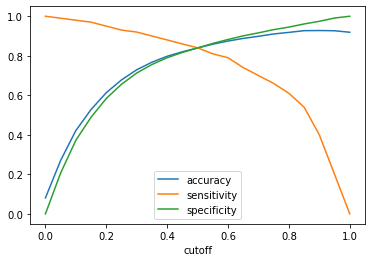

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

Choosing the cut-off value 0.5 as it gives a good Sensitivity and Accuracy.

In [149]:
test_df_final= list(map((lambda x: 0 if x<0.5 else 1),y_test_pca[:,1]))
cm= confusion_matrix(y_test,test_df_final)
cm

array([[6926, 1323],
       [ 117,  610]], dtype=int64)

In [150]:
train_df_final= list(map((lambda x: 0 if x<0.5 else 1),y_train_pca[:,1]))
cm_train= confusion_matrix(y_train,train_df_final)

In [151]:
print(f"Train sensitivity = {round(cm_train[1,1]/(cm_train[1,0]+cm_train[1,1]),2)}\nspecificity= {cm_train[0,0]/(cm_train[0,1]+cm_train[0,0])}\naccuracy={(cm_train[0,0]+cm_train[1,1])/cm_train.sum().sum()}")
print(f"Test sensitivity = {round(cm[1,1]/(cm[1,0]+cm[1,1]),2)}\nspecificity= {cm[0,0]/(cm[0,1]+cm[0,0])}\naccuracy={(cm[0,0]+cm[1,1])/cm.sum().sum()}")

Train sensitivity = 0.84
specificity= 0.8429915285068343
accuracy=0.842756183745583
Test sensitivity = 0.84
specificity= 0.8396169232634259
accuracy=0.839572192513369


### Using PCA we get an accuracy,sensitivity and specificity of 84%

# Feature importance with XGBoost

In [152]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#help(XGBClassifier)

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'max_depth': [2,3,4,5,6],
             'min_child_weight':[5,10,15,20,50]}         


# specify model
xgb_model = XGBClassifier(random_state = 0,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      
# fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"colsample_bytree" : [0.5,0.6,0.7,0.8,0.9],
"subsample" : [0.5,0.6,0.7,0.8,0.9]}         


# specify model
xgb_model = XGBClassifier(random_state=0, max_depth=4, min_child_weight=50, n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      
# fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"reg_alpha" : [10,50,100,150,200,250],
"reg_lambda" : [10,50,100,150,200,250]}         


# specify model
xgb_model = XGBClassifier(max_depth=4, min_child_weight=50,colsample_bytree=0.8,subsample=.8,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      
# fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_).sort_values(by='rank_test_score')
cv_results

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"learning_rate": [0.003,0.007,0.01,0.03,0.07,0.1,0.3,0.7,1,3,10]}         


# specify model
xgb_model = XGBClassifier(max_depth=4, min_child_weight=50,colsample_bytree=0.8,subsample=.8,reg_alpha=10,reg_lambda=250,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=-1)      
# fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_).sort_values(by='rank_test_score')
cv_results

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
#params = {'learning_rate': 0.3,
 #         'max_depth': 4, 
  #        'n_estimators':100,
   #       'subsample':0.8,
    #      'colsample_bytree':0.8,
     #     'min_child_weight':50,
      #   'objective':'binary:logistic'}

# fit model on training data
model = xgb_model = XGBClassifier(max_depth=4,
                                  min_child_weight=50,
                                  colsample_bytree=0.8,
                                  subsample=0.8,
                                  reg_alpha=10,
                                  reg_lambda=250,
                                  n_jobs=-1,
                                  learning_rate=0.3,
                                  random_state=0)
model.fit(X_train, y_train)

In [ ]:
# predict
y_train_xgb = model.predict_proba(X_train)
y_test_xgb= model.predict_proba(X_test)

In [ ]:
# roc_auc
print('train ROC-AUC is', roc_auc_score(y_train, y_train_xgb[:, 1]))
print('test ROC-AUC is', roc_auc_score(y_test, y_test_xgb[:, 1]))

In [ ]:
import sklearn.metrics as metrics

In [ ]:
fpr, tpr, threshold = roc_curve(y_train,y_train_xgb[:,1])

fpr_val, tpr_val, threshold_val = roc_curve(y_test,y_test_xgb[:,1])

roc_auc_train = metrics.auc(fpr, tpr)
roc_auc_val = metrics.auc(fpr_val, tpr_val)


# method I: plt
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC_train = %0.4f' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title('Test Receiver Operating Characteristic')
plt.plot(fpr_val, tpr_val,label = 'AUC_val = %0.4f' % roc_auc_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


In [ ]:
print("Train")
ks_statistic(y_train_xgb[:,1],y_train.values,good=[0],dv_names=dv_names,rate_calc=1,asc_sort=False)

In [ ]:
print("Test")
ks_statistic(y_test_xgb[:,1],y_test.values,good=[0],dv_names=dv_names,rate_calc=1,asc_sort=False)

In [ ]:
cut_off= [x/20 for x in range(0,21)]
cut_off_df= pd.DataFrame(columns=['cutoff','accuracy','sensitivity','specificity'])
for n,m in enumerate(cut_off):
    test_df_final= list(map((lambda x: 0 if x<m else 1),y_test_xgb[:,1]))
    accuracy= accuracy_score(y_test,test_df_final)
    cm= confusion_matrix(y_test,test_df_final)
    sensitivity= round(cm[1,1]/(cm[1,0]+cm[1,1]),2)
    specificity= cm[0,0]/(cm[0,1]+cm[0,0])
    cut_off_df.loc[n]=[m,accuracy,sensitivity,specificity]
cut_off_df

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

In [ ]:
# plot
plt.figure(figsize=(20,10))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
# feature importance
xgb_imp_features = pd.DataFrame({"idvs":X_train.columns, "feature_imp":model.feature_importances_})
xgb_imp_features.sort_values('feature_imp',ascending=False).reset_index(drop=True)

## Building a log regression model on non-zero important idvs to check its coef and direction

In [ ]:
list(xgb_imp_features[xgb_imp_features['feature_imp']>0].idvs)

In [ ]:
## Hard coding idv list
imp_features_log_idvs = ['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_8',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_8',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jun_vbc_3g',
 'was_roam_7',
 'was_roam_8',
 'max_decrease_rev',
 'max_off_net_8',
 'av_rech_amt_6',
 'av_rech_amt_7',
 'av_rech_amt_8',
 'arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'loc_og_mou_diff',
 'std_og_mou_diff',
 'spl_og_mou_diff',
 'total_og_mou_diff',
 'loc_ic_mou_diff',
 'std_ic_mou_diff',
 'spl_ic_mou_diff',
 'total_ic_mou_diff',
 'total_rech_num_diff',
 'total_rech_amt_diff',
 'max_rech_amt_diff',
 'total_rech_data_diff',
 'max_rech_data_diff',
 'av_rech_amt_data_diff',
 'av_rech_amt_diff',
 'vol_2g_mb_diff',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8',
 'tot_rech_6',
 'tot_rech_7',
 'tot_rech_8',
 'recharged_day_diff_6_7',
 'recharged_day_diff_7_8']

In [ ]:
##Checking the corr of idvs
sns.heatmap(X_train[imp_features_log_idvs])

In [ ]:
## Nearly all the variables are having 0 correlation. Building a log regression model on top of it

In [ ]:
# hyperparameter tuning with logreg

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'C': [0.003,0.006,0.009,0.03,0.06,0.09,0.3,0.6,0.9,3,6,9,10,30,50,100]}         


# specify model
lm = LogisticRegression(penalty='l1',class_weight='balanced',solver = 'liblinear')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = lm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      
# fit the model
model_cv.fit(X_train[imp_features_log_idvs], y_train)       

In [ ]:
cv_results= pd.DataFrame(model_cv.cv_results_).sort_values(by='rank_test_score')
cv_results

In [ ]:
from sklearn.metrics import roc_auc_score,log_loss

In [ ]:
c_value = 0.09

cust_clf = LogisticRegression(penalty='l1',random_state=0,C=c_value,solver = 'liblinear',class_weight='balanced')
cust_clf.fit(X_train[imp_features_log_idvs],y_train)
dev_pred = pd.Series(cust_clf.predict_proba(X_train[imp_features_log_idvs])[:,1])
val_pred = pd.Series(cust_clf.predict_proba(X_test[imp_features_log_idvs])[:,1])

print("Train KS:",calculate_max_ks(dev_pred,y_train.values,good=[0]),
               "\nTest KS:",calculate_max_ks(val_pred,y_test,good=[0]),
               "\nTrain ROC:",roc_auc_score(y_train.values,dev_pred),
               "\nTest ROC:",roc_auc_score(y_test.values,val_pred),
               "\nTrain Loss:",log_loss(y_train.values,dev_pred),
               "\nTest Loss:",log_loss(y_test.values,val_pred),
             )


In [ ]:
print("Train")
ks_statistic(dev_pred,y_train.values,good=[0],dv_names=dv_names,rate_calc=1,asc_sort=False)

In [ ]:
print("Test")
ks_statistic(val_pred,y_test.values,good=[0],dv_names=dv_names,rate_calc=1,asc_sort=False)

In [ ]:
fpr, tpr, threshold = roc_curve(y_train,dev_pred)

fpr_val, tpr_val, threshold_val = roc_curve(y_test,val_pred)

roc_auc_train = metrics.auc(fpr, tpr)
roc_auc_val = metrics.auc(fpr_val, tpr_val)


# method I: plt
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Train Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC_train = %0.4f' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.title('Test Receiver Operating Characteristic')
plt.plot(fpr_val, tpr_val,label = 'AUC_val = %0.4f' % roc_auc_val)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


In [ ]:
cust_log_clf= pd.DataFrame({"coef":cust_clf.coef_[0],"idvs":imp_features_log_idvs})
cust_log_clf['abs_coef'] = cust_log_clf['coef'].abs()
print (cust_log_clf.sort_values('abs_coef',ascending=False))

### The feature importance and their coef values are as shown above for the most predictive variables

### Recommendation
From the analysis and from the predictive power of models we can say a person is highly likely to be churned if the revenue generated by him is decreasing. Few of the reasons that can raise to the situation are

1. roaming users: better offers on roaming for roaming user can help in reducing the churn rate.
2. The lesser the incoming call to the user, higher chances of churn. This may be due to poor network which the company should think about improving.
3. Giving better offers to STD&ISD callers can help in reducing the churn rate.
4. Customers who are engaging with call centers are less likly to be churned out. So keeping the customer updated on the offers, resolving issues etc will help in retaining the customers.
5. New customers are more susceptible to be churned than old customers. So giving attractive offers/rewards can help in retaining them.

<!-- Useful analysis that the company should think for in order to reduce the churn customers.

On a broad prospective the last month that is 8, is very crucial for predicting the churns. As we have also seen it during EDA, most of the varibales are having much difference as compared to good months (6 & 7).

1) The variable Total_rech_8 should not be lower. In case any customer is not having any kind of recharge may be call or data, the company should focus on that customer to give him/her some offer.

2) The company should also focus on the customers who are not having any kind of incoming call. This may be due to poor network which the company should think about to improve as we know incoming calls are generally do not require any cost.

3) During EDA we have noticed that people who are with the network for long time are less likely to churn as compared to the new customers. People generally have a trust when they use it for long time. The company should also focus more on the new customers experience as they are more likely to get churned. -->